
### Revisão do Conteúdo Anterior

- **Aprendizagem de Máquina e seus Tipos**: Exploramos o que é aprendizagem de máquina e como ela pode ser categorizada em diferentes tipos.
- **Classificação e Regressão**: Discutimos as diferenças fundamentais entre tarefas de classificação e regressão e como abordá-las.
- **Risco Empírico vs. Risco Estrutural**: Entendemos a diferença entre o risco empírico, baseado nos dados que temos em mãos, e o risco estrutural, que é inerente ao nosso modelo e aos dados que poderíamos obter.

### Por que Dimensão VC e Dilema Bias-Variance são importantes?

Os conceitos que abordaremos hoje são cruciais para qualquer cientista de dados. Eles nos ajudam a compreender:

- **Complexidade dos Modelos**: O quanto um modelo pode ser flexível e a capacidade dele em adaptar-se aos dados.
- **Performance dos Modelos**: Como diferentes modelos performam dependendo da sua complexidade e dos dados que têm à disposição.
- **Overfitting e Underfitting**: Extremos que queremos evitar ao treinar nossos modelos.

Estes conceitos nos fornecerão as ferramentas para entender, diagnosticar e melhorar a performance dos nossos modelos de machine learning.

---


# Introdução à Dimensão VC e Dilema Bias-Variance


# Dimensão VC (Vapnik-Chervonenkis)

A **Dimensão VC** é um conceito teórico que mede a capacidade de um modelo de aprendizado estatístico em fitar diferentes conjuntos de dados. Em outras palavras, ela representa o número de pontos que o modelo pode classificar sem erro, independentemente de sua distribuição.

A Dimensão VC nos ajuda a entender quão flexível é um modelo. Um modelo com alta Dimensão VC pode ajustar-se a uma ampla variedade de formas e padrões nos dados. No entanto, é preciso ter cuidado, pois modelos com uma Dimensão VC muito alta podem facilmente se sobreajustar aos dados.

---

# Dilema Bias-Variance

O **Dilema Bias-Variance** é um conceito fundamental em aprendizado de máquina que refere-se ao trade-off (Trade-off refere-se a uma situação em que, para ganhar uma coisa, você tem que sacrificar outra. Em outras palavras, é um equilíbrio entre dois fatores, onde melhorar um pode resultar na degradação do outro) que ocorre ao tentarmos minimizar os dois erros principais:


# Trade-off entre Viés e Variância

O equilíbrio entre viés e variância é um conceito central no aprendizado de máquina, e entender essa relação é crucial para construir modelos robustos e precisos. Vamos entender a importância destes termos:

1. **Importância do Bias (Viés):**
O viés nos dá uma indicação de quão longe nossas previsões estão dos valores reais. Se o viés é alto, significa que nosso modelo está fazendo suposições erradas sobre a natureza da relação entre as entradas e as saídas. Ignorar o viés elevado pode levar a modelos que sistematicamente erram as previsões, independentemente da quantidade de dados disponível.

2. **Importância da Variance (Variância):**
A variância nos dá uma indicação da sensibilidade do modelo às flutuações nos dados. Um modelo com alta variância se ajusta muito aos dados de treinamento, mas pode falhar ao generalizar para novos dados. Se ignorarmos a variância, podemos criar modelos que se ajustam perfeitamente aos dados de treinamento, mas que falham miseravelmente em qualquer dado novo.

**Por que é crucial entender esses conceitos?**
Simplificando, porque queremos modelos que generalizem bem para dados não vistos. Se focarmos apenas em reduzir o viés (fazendo o modelo se ajustar perfeitamente aos dados de treinamento), podemos aumentar a variância, o que reduz a capacidade do modelo de se generalizar. Por outro lado, se focarmos apenas em reduzir a variância (usando modelos muito simples), podemos não capturar todas as informações relevantes nos dados, resultando em um alto viés. O equilíbrio entre viés e variância nos permite construir modelos que são simultaneamente precisos e generalizáveis.

Em termos simples, **Bias** é o erro de nosso modelo devido à suposição simplista. Enquanto **Variance** é o erro devido ao modelo ser excessivamente complexo.

O objetivo em qualquer problema de aprendizado de máquina é encontrar um equilíbrio entre o viés e a variância, de modo que o erro total seja mínimo.

# Dimensão VC (Vapnik-Chervonenkis)

## Definição e Origem

A **Dimensão VC**, nomeada em homenagem aos matemáticos Vladimir Vapnik e Alexey Chervonenkis, é uma medida teórica usada para quantificar a capacidade de um modelo de aprendizado estatístico de fitar dados. De maneira simples, é uma métrica que nos ajuda a entender o quão flexível um modelo pode ser.

## Capacidade do Modelo

Um modelo com uma **alta Dimensão VC** tem uma capacidade elevada de se ajustar perfeitamente a um conjunto de dados, mesmo que este conjunto seja muito ruidoso ou contenha outliers. Por outro lado, um modelo com **baixa Dimensão VC** pode não conseguir se ajustar a conjuntos de dados mais complexos, mas tem a vantagem de ser menos suscetível ao overfitting.

## Relação com a Complexidade do Modelo

A Dimensão VC está intrinsecamente ligada à complexidade do modelo:
- Modelos mais **simples** tendem a ter uma **Dimensão VC baixa**.
- Modelos mais **complexos**, como redes neurais profundas, podem ter uma **Dimensão VC muito alta**.

No entanto, é crucial entender que uma alta Dimensão VC não garante que o modelo terá um bom desempenho em dados não vistos. Precisamos equilibrar essa capacidade do modelo com a quantidade e qualidade dos dados disponíveis e com o risco de overfitting.

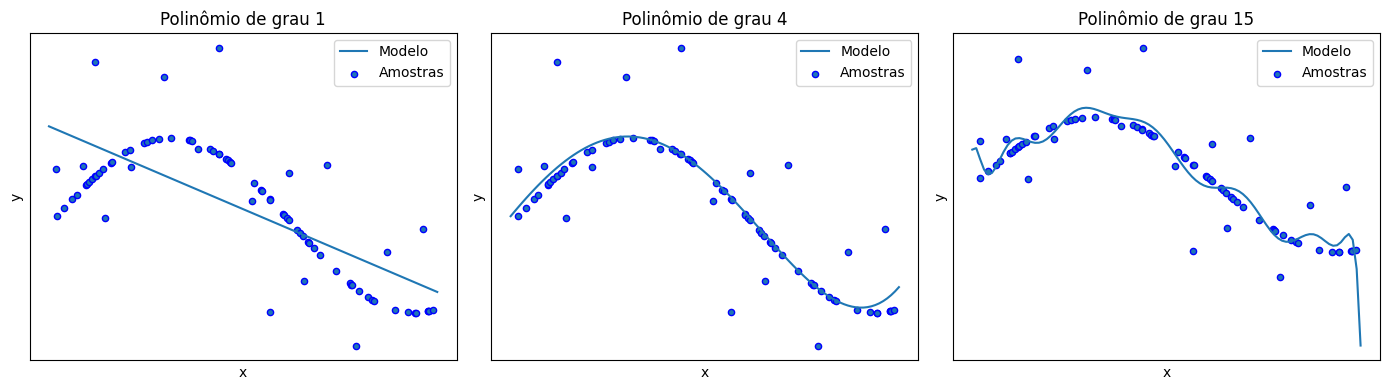

In [1]:
# Com Polinômios
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Gerando dados para o exemplo
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))

# Função para plotar os resultados
def plot_results(model, title, subplot):
    model.fit(X, y)
    ax = plt.subplot(subplot)
    plt.setp(ax, xticks=(), yticks=())
    X_test = np.linspace(0, 5, 100)[:, np.newaxis]
    plt.plot(X_test, model.predict(X_test), label="Modelo")
    plt.scatter(X, y, edgecolor='b', s=20, label="Amostras")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.legend(loc="best")

# Modelos com diferentes graus de polinômio (representando diferentes Dimensões VC)
degrees = [1, 4, 15]

plt.figure(figsize=(14, 4))
for i, degree in enumerate(degrees, start=1):
    polynomial = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    model = Pipeline([("polynomial_features", polynomial), ("linear_regression", linear_regression)])
    plot_results(model, f"Polinômio de grau {degree}", 131 + i - 1)

plt.tight_layout()
plt.show()

# Comentários:
# O modelo de grau 1 (Dimensão VC baixa) não se ajusta bem aos dados.
# O modelo de grau 4 tem um bom ajuste.
# O modelo de grau 15 (Dimensão VC alta) se ajusta perfeitamente às amostras, incluindo o ruído, indicando overfitting.


4/4 [==============================] - 0s 3ms/step


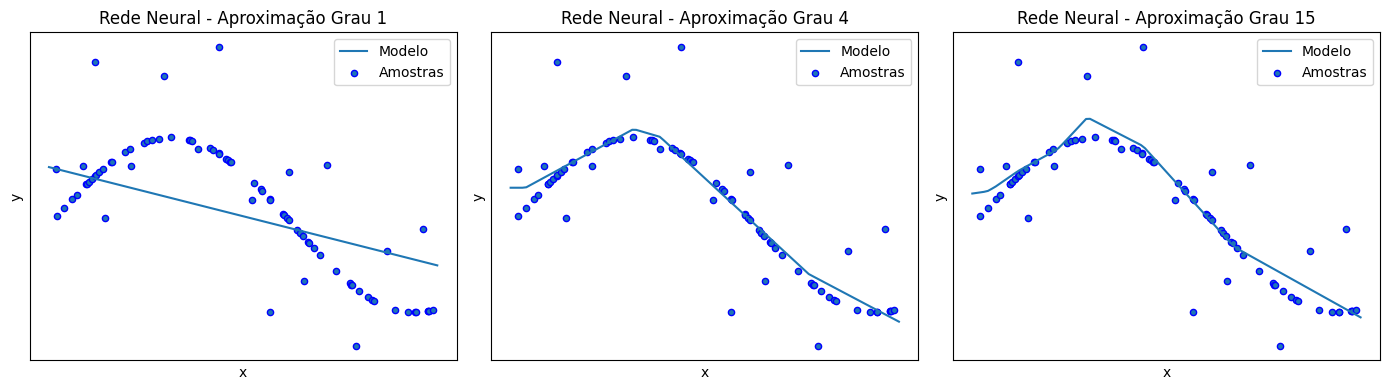

In [2]:
# Com redes neurais
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Função para plotar os resultados
def plot_results_nn(model, title, subplot):
    model.fit(X, y, epochs=1000, verbose=0)
    ax = plt.subplot(subplot)
    plt.setp(ax, xticks=(), yticks=())
    X_test = np.linspace(0, 5, 100)[:, np.newaxis]
    plt.plot(X_test, model.predict(X_test), label="Modelo")
    plt.scatter(X, y, edgecolor='b', s=20, label="Amostras")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.legend(loc="best")

# Modelo que aproxima o Polinômio de Grau 1
model1 = Sequential()
model1.add(Dense(1, activation='linear', input_dim=1))  # Camada de entrada e única camada oculta
model1.compile(optimizer='adam', loss='mse')

# Modelo que aproxima o Polinômio de Grau 4
model4 = Sequential()
model4.add(Dense(5, activation='relu', input_dim=1))  # Camada de entrada
model4.add(Dense(5, activation='relu'))  # Primeira camada oculta
model4.add(Dense(1, activation='linear'))  # Camada de saída
model4.compile(optimizer='adam', loss='mse')

# Modelo que aproxima o Polinômio de Grau 15
model15 = Sequential()
model15.add(Dense(50, activation='relu', input_dim=1))  # Camada de entrada
model15.add(Dense(30, activation='relu'))  # Primeira camada oculta
model15.add(Dense(30, activation='relu'))  # Primeira camada oculta
model15.add(Dense(1, activation='linear'))  # Camada de saída
model15.compile(optimizer='adam', loss='mse')

# Plotando os resultados
plt.figure(figsize=(14, 4))

plot_results_nn(model1, "Rede Neural - Aproximação Grau 1", 131)
plot_results_nn(model4, "Rede Neural - Aproximação Grau 4", 132)
plot_results_nn(model15, "Rede Neural - Aproximação Grau 15", 133)

plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Carregando os dados
df = pd.read_csv('notebooks.csv')
X = df.drop(columns='valor').values
y = df['valor'].values

# Dividindo os dados em conjuntos de teste (10%) e o restante (90%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Dividindo o X_temp em três conjuntos de treinamento de tamanhos iguais
X_train1, X_temp, y_train1, y_temp = train_test_split(X_temp, y_temp, test_size=(2/3), random_state=42)
X_train2, X_train3, y_train2, y_train3 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_trains = [X_train1, X_train2, X_train3]
y_trains = [y_train1, y_train2, y_train3]

# Treinando e avaliando modelos
for i, (X_t, y_t) in enumerate(zip(X_trains, y_trains)):
    # Usamos um modelo polinomial de grau 2 como exemplo
    model = Pipeline([("polynomial_features", PolynomialFeatures(degree=2, include_bias=False)),
                      ("linear_regression", LinearRegression())])
    model.fit(X_t, y_t)

    train_error = mean_squared_error(y_t, model.predict(X_t))
    test_error = mean_squared_error(y_test, model.predict(X_test))

    print(f"Subconjunto de treinamento {i+1} (Tamanho {len(X_t)}):")
    print(f"Erro de treinamento: {train_error:.2f}")
    print(f"Erro de teste: {test_error:.2f}\n")


Subconjunto de treinamento 1 (Tamanho 3000):
Erro de treinamento: 8032375.29
Erro de teste: 8430906.30

Subconjunto de treinamento 2 (Tamanho 3000):
Erro de treinamento: 7526999.14
Erro de teste: 8271345.44

Subconjunto de treinamento 3 (Tamanho 3000):
Erro de treinamento: 7596296.12
Erro de teste: 8263093.96



# Análise dos Resultados e Relação com a Dimensão VC

## Consistência do Erro

- **Visão Geral**: A consistência nos erros de treinamento e teste em todos os subconjuntos indica que a capacidade do modelo (ou sua Dimensão VC) está relativamente bem alinhada com a complexidade dos dados.
  
- **Sinal de Alta Capacidade**: Se tivéssemos um modelo de alta capacidade (alta Dimensão VC), poderíamos ver um erro de treinamento muito baixo, mas um erro de teste significativamente mais alto, indicando overfitting.

## Variação entre Subconjuntos

- **Influência dos Dados no Treinamento**: A variação nos erros entre diferentes subconjuntos reflete a influência dos dados específicos no treinamento.
  
- **Análise da Variação**: Essa variação não é drasticamente diferente, o que indica que a capacidade do modelo é suficientemente flexível para se adaptar a diferentes subconjuntos de dados.
  
- **Sinal de Baixa Capacidade**: Se o modelo tivesse uma Dimensão VC muito baixa (pouca capacidade), poderíamos ver uma grande variação nos erros de treinamento/teste, porque o modelo não seria capaz de se ajustar bem a variações nos dados.

## Relação com a Dimensão VC

- **Estimativa da Dimensão VC**: Para ter uma noção exata da Dimensão VC, teríamos que avaliar o modelo em todos os possíveis subconjuntos de dados e ver como ele se comporta. Na prática, isso é inviável, então usamos métricas como erro de treinamento e teste para ter uma ideia.
  
- **Analisando os Erros**:
  - **Overfitting**: Se os erros de treinamento forem consistentemente baixos e os erros de teste consistentemente altos em vários subconjuntos, isso pode indicar um modelo com uma Dimensão VC muito alta.
  - **Underfitting**: Se ambos os erros forem altos, o modelo pode ter uma Dimensão VC muito baixa.

- **Conclusão para o Caso Atual**: Em nosso caso, o modelo parece ter uma capacidade adequada para os dados, pois os erros de treinamento e teste são relativamente consistentes em diferentes subconjuntos. No entanto, para ter uma compreensão mais clara da Dimensão VC, seria ideal experimentar com modelos de diferentes complexidades e observar como os erros de treinamento e teste variam.


# Dilema Bias-Variance

## Introdução ao Bias e Variance

Ao treinar modelos de machine learning, frequentemente nos deparamos com duas fontes principais de erros: **Bias (Viés)** e **Variance (Variância)**.

- **Bias (Viés)**: Erro devido a suposições errôneas no algoritmo de aprendizado. Um alto bias pode fazer o algoritmo perder relações relevantes entre características e saídas previstas, resultando em um modelo subajustado (underfitting).
- **Variance (Variância)**: Erro devido à sensibilidade excessiva às pequenas flutuações no conjunto de treinamento. Uma alta variância pode fazer com que um modelo capture ruído nos dados de treinamento, levando ao sobreajuste (overfitting).

## Impacto na Performance do Modelo

- Modelos com **alto bias** não são flexíveis o suficiente para capturar padrões complexos nos dados.
- Modelos com **alta variância** capturam demais os dados, incluindo o ruído, e não generalizam bem para novos dados.

## Decomposição do Erro

O erro de um modelo pode ser decomposto da seguinte forma:
\[ Erro \ Total = Viés^2 + Variância + Erro \ Irredutível \]

Onde:
- **Erro Irredutível**: É o erro introduzido por fatores desconhecidos ou inerentes ao problema. É uma constante e independe do modelo escolhido.


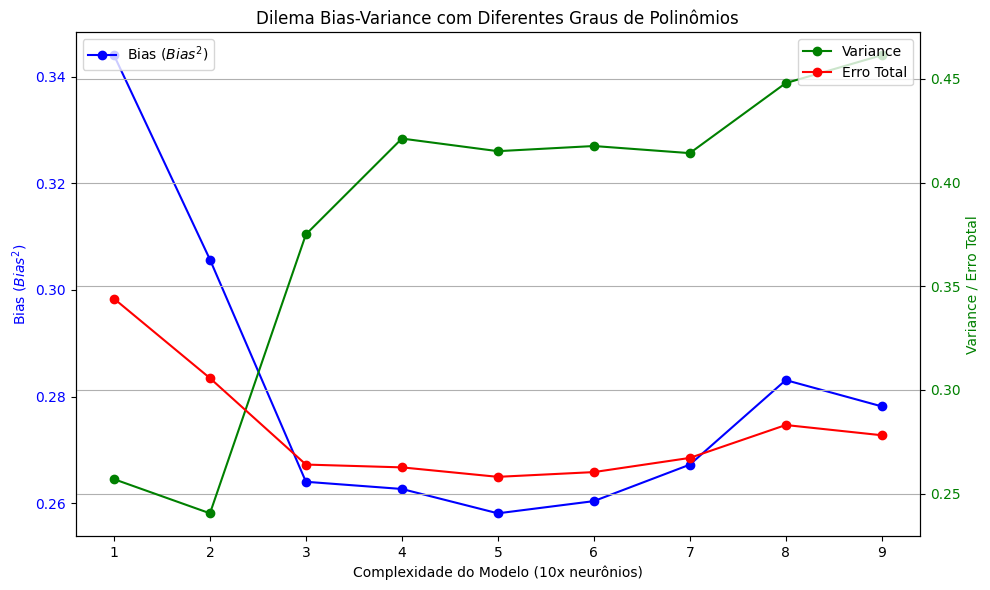

In [4]:
# Exemplo, visualizaremos o efeito do bias e da variância ao ajustar a complexidade de um modelo e entenderemos sua relação com o erro total
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Gerando dados para o exemplo
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))

# Função para calcular bias, variance e erro total
def calculate_bias_variance(models, X_train, X_test, y_train, y_test):
    biases, variances, errors = [], [], []
    for model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Calculando bias e variance
        bias = np.mean((predictions - y_test) ** 2)
        variance = np.var(predictions)
        error = mean_squared_error(y_test, predictions)

        biases.append(bias)
        variances.append(variance)
        errors.append(error)
    return biases, variances, errors

# Dividindo o conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando modelos com diferentes graus de polinômio
degrees = list(range(1, 10))
models = [Pipeline([("polynomial_features", PolynomialFeatures(degree=degree, include_bias=False)),
                    ("linear_regression", LinearRegression())]) for degree in degrees]

biases, variances, errors = calculate_bias_variance(models, X_train, X_test, y_train, y_test)

plt.figure(figsize=(10, 6))

# Criando um eixo para bias
ax1 = plt.gca()
ax1.plot(range(1, 10), biases, label='Bias ($Bias^2$)', marker='o', color='blue')
ax1.set_xlabel('Complexidade do Modelo (10x neurônios)')
ax1.set_ylabel('Bias ($Bias^2$)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criando um segundo eixo para variância e erro total
ax2 = ax1.twinx()
ax2.plot(range(1, 10), variances, label='Variance', marker='o', color='green')
ax2.plot(range(1, 10), errors, label='Erro Total', marker='o', color='red')
ax2.set_ylabel('Variance / Erro Total', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Dilema Bias-Variance com Diferentes Graus de Polinômios')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# A medida que o grau do polinômio aumenta, o bias diminui, mas a variância aumenta.
# O erro total tem um ponto de mínimo, onde a combinação de bias e variância é ótima.

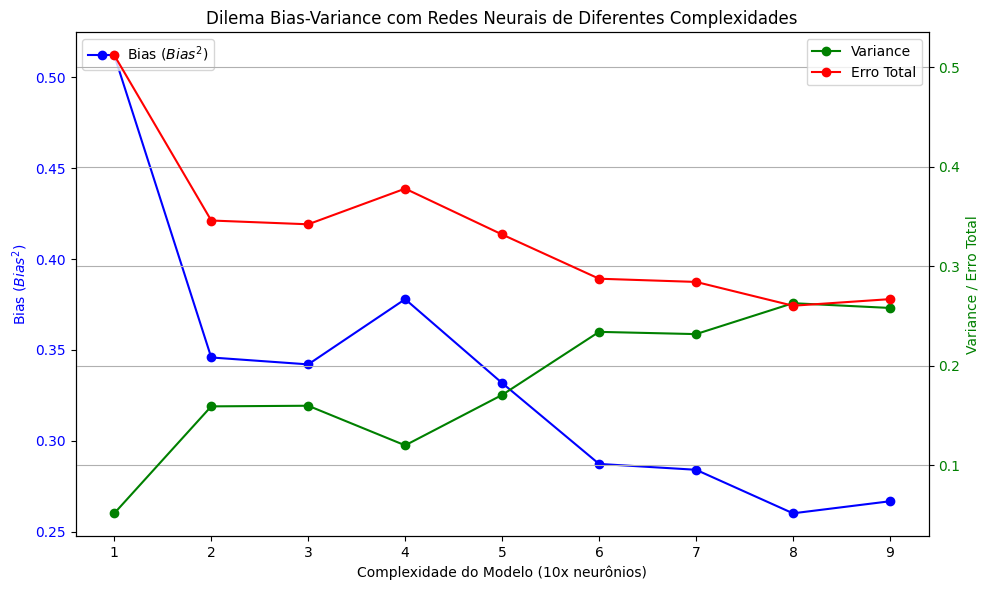

In [5]:
from IPython.display import clear_output
# Função para calcular bias, variance e erro total
def calculate_bias_variance(models, X_train, X_test, y_train, y_test):
    biases, variances, errors = [], [], []
    for model in models:
        model.fit(X_train, y_train, epochs=150, verbose=0)  # Treinando cada modelo
        predictions = model.predict(X_test).flatten()  # Previsões do modelo

        # Calculando bias, variance e erro total
        bias = np.mean((predictions - y_test) ** 2)
        variance = np.var(predictions)
        error = mean_squared_error(y_test, predictions)

        biases.append(bias)
        variances.append(variance)
        errors.append(error)
    return biases, variances, errors

# Dividindo o conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando modelos de redes neurais correspondentes a diferentes "complexidades"
models = []
for cont in range(1, 10):
    model = Sequential()
    model.add(Dense(10*cont , activation='relu', input_dim=1))  # Camada de entrada e oculta, aumentando neurônios conforme o loop
    model.add(Dense(1, activation='linear'))  # Camada de saída
    model.compile(optimizer='adam', loss='mse')
    models.append(model)

biases, variances, errors = calculate_bias_variance(models, X_train, X_test, y_train, y_test)
clear_output(wait=True)

plt.figure(figsize=(10, 6))

# Criando um eixo para bias
ax1 = plt.gca()
ax1.plot(range(1, 10), biases, label='Bias ($Bias^2$)', marker='o', color='blue')
ax1.set_xlabel('Complexidade do Modelo (10x neurônios)')
ax1.set_ylabel('Bias ($Bias^2$)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criando um segundo eixo para variância e erro total
ax2 = ax1.twinx()
ax2.plot(range(1, 10), variances, label='Variance', marker='o', color='green')
ax2.plot(range(1, 10), errors, label='Erro Total', marker='o', color='red')
ax2.set_ylabel('Variance / Erro Total', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Dilema Bias-Variance com Redes Neurais de Diferentes Complexidades')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# À medida que a complexidade do modelo (número de neurônios) aumenta, o bias tende a diminuir, mas a variância aumenta.
# O erro total tem um ponto de mínimo, onde a combinação de bias e variância é ótima.

# 2.1 Demonstração Prática: Overfitting e Underfitting

## Relembrando conceitos

**Overfitting**:
- Quando o modelo é muito complexo e se ajusta demais aos dados de treinamento, mas tem um desempenho ruim em novos dados não vistos.
- Captura ruídos e anomalias dos dados, em vez de padrões gerais.

**Underfitting**:
- Ocorre quando o modelo é muito simples para capturar as nuances e padrões dos dados.
- Pode falhar tanto nos dados de treinamento quanto nos dados não vistos.

---

## Relação com o Dilema Bias-Variance

- **Overfitting** está associado a uma **baixa bias** (pois ajusta-se bem aos dados de treinamento) e **alta variância** (pois varia muito com diferentes conjuntos de treinamento).
- **Underfitting** está relacionado com **alto bias** (pois não se ajusta bem mesmo aos dados de treinamento) e **baixa variância** (pois a resposta não muda muito com diferentes conjuntos de treinamento).

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


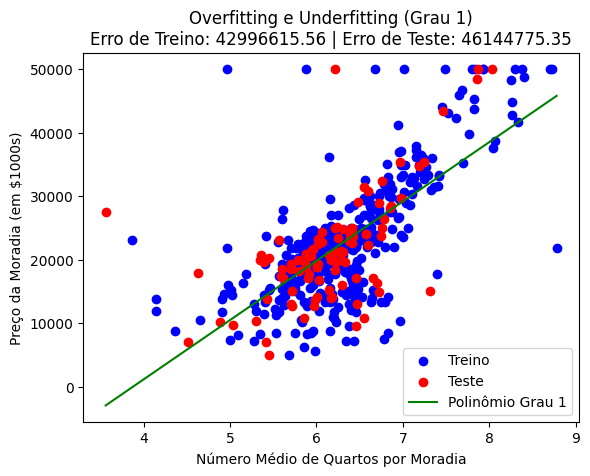

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


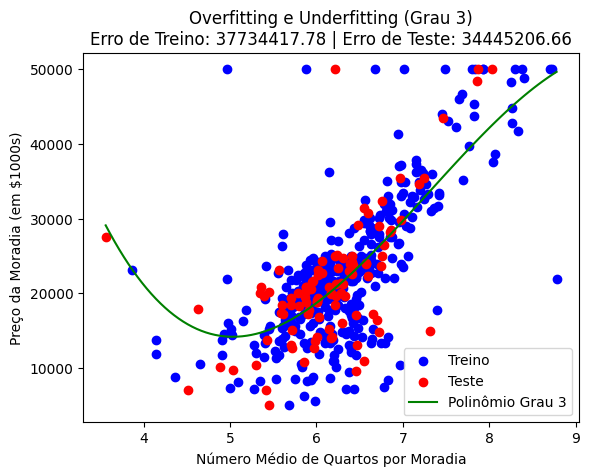

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


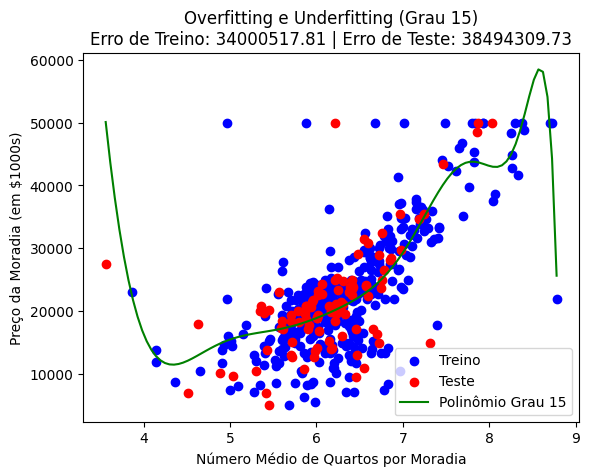

(34000517.811592385, 38494309.72719893)

In [6]:
# Importando bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('casas_boston.csv')

# Separando a coluna de quartos e valor (target)
X = df[['quartos']]
y = df['valor']
# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Função para treinar e visualizar o modelo
def train_and_plot(degree=1):
    # Transformando o feature com PolynomialFeatures
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Treinando o modelo de regressão
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predições
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Métricas de erro
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Plotando
    plt.scatter(X_train, y_train, color='blue', label='Treino')
    plt.scatter(X_test, y_test, color='red', label='Teste')

    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_range_pred = model.predict(X_range_poly)

    plt.plot(X_range, y_range_pred, color='green', label=f'Polinômio Grau {degree}')
    plt.title(f'Overfitting e Underfitting (Grau {degree})\nErro de Treino: {train_error:.2f} | Erro de Teste: {test_error:.2f}')
    plt.xlabel('Número Médio de Quartos por Moradia')
    plt.ylabel('Preço da Moradia (em $1000s)')
    plt.legend()
    plt.show()

    return train_error, test_error

# Modelo de Regressão Linear Simples (Underfitting)
train_and_plot(1)

# Modelo de Regressão Linear Simples (Underfitting)
train_and_plot(3)

# Modelo Polinomial de Grau 10 (Overfitting)
train_and_plot(15)